In [1]:
from numpy import *
import pandas as pd

In [2]:
movies_df=pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId':'int32','title':'str'})
rating_df=pd.read_csv('ratings.csv')
rating_df.drop('timestamp',inplace=True,axis=1)

In [3]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [4]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [5]:
df=pd.merge(rating_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [6]:
combine_movie_rating=df.dropna(axis=0,subset=['title'])
movie_ratingcount=(combine_movie_rating.groupby(by=['title'])['rating'].count().reset_index().rename(columns={'rating':'total rating count'}))

In [7]:
movie_ratingcount.head()

,title,total rating count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [8]:
rat_with_totratcount=combine_movie_rating.merge(movie_ratingcount,left_on='title',right_on='title',how='left')
rat_with_totratcount.head()

,userId,movieId,rating,title,total rating count
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [9]:
movie_ratingcount['total rating count'].describe()

count    9719.000000
mean       10.375141
std        22.406220
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: total rating count, dtype: float64

<AxesSubplot:>

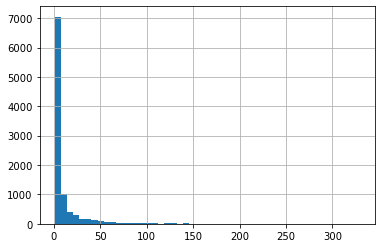

In [10]:
movie_ratingcount['total rating count'].hist(bins=50)

In [11]:
rating_popular_mov=rat_with_totratcount[rat_with_totratcount['total rating count']>50]
rating_popular_mov.head()

,userId,movieId,rating,title,total rating count
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [12]:
rating_popular_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40712 entries, 0 to 79250
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userId              40712 non-null  int64  
 1   movieId             40712 non-null  int64  
 2   rating              40712 non-null  float64
 3   title               40712 non-null  object 
 4   total rating count  40712 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ MB


In [13]:
movie_feature=rating_popular_mov.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_feature.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [43]:
from scipy.sparse import csr_matrix

In [44]:
mov_fea_df_mat=csr_matrix(movie_feature.values)
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')

In [51]:
model_knn.fit(mov_fea_df_mat)
movie_feature.shape

(437, 606)

In [52]:
q_in=random.choice(movie_feature.shape[0])
print(q_in)

324


In [53]:
distance,indices=model_knn.kneighbors(movie_feature.iloc[q_in,:].values.reshape(1,-1),n_neighbors=6)

In [48]:

indices

array([[ 73, 139, 408, 210, 269, 195]], dtype=int32)

In [54]:
for i in range(0,len(distance.flatten())):
    if i==0:
        print('Recommendations for {0}:\n'.format(movie_feature.index[q_in]))
    else:
        print('{0},{1},with distance of {2}:'.format(i,movie_feature.index[indices.flatten()[i]],distance.flatten()[i]))

Recommendations for RoboCop (1987):

1,Total Recall (1990),with distance of 0.334274954513743:
2,Lethal Weapon (1987),with distance of 0.3374175486826607:
3,Terminator, The (1984),with distance of 0.3595445115903788:
4,Superman (1978),with distance of 0.3711941943447822:
5,Predator (1987),with distance of 0.37956829381477153:
